<a href="https://colab.research.google.com/github/ch00226855/CMP414765Spring2022/blob/main/Week02_FirstExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 2: First Machine Learning Example

**Reading**: Chapter 1. The Machine Learning Landscape



## What is Machine Learning?

Machine Learning is the science of programming computers so they can perform certain task with knowledge learned from data.

**Example: spam filter**
- Task: to flag spam for new emails
- Data: existing emails with labels (either spam or non-spam)
- Performance measure:
    - percentage of correctly labeled emails
    - percentage of a spam email being labeled correctly.
    - percentage of a non-spam email being labeled correctly.
    - Classification efficiency
    - ...

## Why Use Machine Learning?

Traditional approach for spam filter:
1. Choose features of spam emails manually: "4U", "credit card", "free", "amazing"
2. Write an program to detect exactly the features you chose
3. Test the program and modify the features until satisfactory

Drawbacks of traditional approach: 
1. A large amount of features are needed - hard to maintain
2. Spammers may change their writing to avoid explicit rules: change "4U" to "For U".
3. For some complex problems, manually-engineered features are not good enough: hand-written digits

Machine Learning models:
1. Automatically learns which words and phrases are good predictors of spam. 
2. Since the program is not a stack of explicit rules, it is much shorter, easier to maintain, and most likely more accurate.
3. With new training data, the Machine Learning model can update automatically to capture new indicators of spam emails.

What Machine Learning is great for:
1. Problems for which existing solutions require a lot of hand-tuning or long lists of rules: one Machine Learning algorithm can often simplify code and perform better.
2. Complex problems for which there is no good solution at all using a traditional approach: the best Machine Learning techniques can find a solution.
3. Fluctuating environments: a Machine Learning system can adapt to new data.
4. Large amount of data: With Machine Learning, computers process big data faster than human.


## First Example: Men's Height in the United States

As an illustration of machine learning practice, let's consider the task of understanding the trend of American men's height in the 20th century. This project requires the following stages:
- Data preparation
- Data exploration
- Model training
- Model evaluation
- Model application

### 1. Download Data
- Go to website:  https://ourworldindata.org/human-height
- Find the interactive chart "Increase of human height over two centuries"
- Click the "Download" tab, and download the CSV (comma-separated-values) file containing height data.

After downloading, you can open it a text editor to view its content.

### 2. Upload the CSV file to Google Colab
- Click "Files" icon on the left column.
- Click "Upload to session storage"
- Upload the CSV file.

Afterwards, you should see the file listed in the files tab.


### 3. Load Data into Python
- Import numpy, pandas, and matplotlib.
- Load the data as a DataFrame using the following statement:
`raw_data = pd.read_csv(filename, sep=',')`

Now the data in the .csv file are loaded to the DataFrame `raw_data`. You can display its first 5 rows using `raw_data.head()`.

In [1]:
import numpy as np  # scientific computation
import pandas as pd  # data handling
import matplotlib.pyplot as plt  # plotting
# The following "magic command" allows figures to be displayed automatically in notebook
%matplotlib inline  

In [2]:
raw_data = pd.read_csv("average-height-of-men-for-selected-countries.csv", sep=',')

In [8]:
raw_data.head()

,Entity,Code,Year,Human Height (University of Tuebingen (2015))
0,Afghanistan,AFG,1870,168.4
1,Afghanistan,AFG,1880,165.7
2,Afghanistan,AFG,1930,166.8
3,Albania,ALB,1880,170.1
4,Albania,ALB,1890,169.8


### DataFrame
Data frame is a way to store data in rectangular grids that can easily be overviewed. Each row of these grids corresponds to measurements or values of an instance, while each column is a vector containing data for a specific variable. A data frame's row may contain different types of values: numeric, character, logical, etc.

Data frames in Python come with the Pandas libarary, and they are defined as a two-dimensional labeled data structures with columns of potentially different types.

### 4. Extract US Data
- Create a filter on the rows with condition "Entity = United States"
- Use the filter to select rows related to US.
- Create another filter with condition "Year >= 1900", and use it to filter the data.
- Display the resulting data frame.

In [9]:
filter1 = (raw_data['Entity'] == "United States")
print(filter1)

0       False
1       False
2       False
3       False
4       False
        ...  
1245    False
1246    False
1247    False
1248    False
1249    False
Name: Entity, Length: 1250, dtype: bool


In [10]:
filter1 = (raw_data['Entity'] == "United States")
data = raw_data[filter1]
data

,Entity,Code,Year,Human Height (University of Tuebingen (2015))
1194,United States,USA,1820,172.2
1195,United States,USA,1830,173.5
1196,United States,USA,1840,172.2
1197,United States,USA,1850,171.1
1198,United States,USA,1860,170.6
1199,United States,USA,1870,171.1
1200,United States,USA,1880,169.5
1201,United States,USA,1890,169.1
1202,United States,USA,1900,170.0
1203,United States,USA,1910,172.1


In [11]:
# You can combine the two steps in one statement
data = raw_data[raw_data['Entity'] == "United States"]
data.head()

,Entity,Code,Year,Human Height (University of Tuebingen (2015))
1194,United States,USA,1820,172.2
1195,United States,USA,1830,173.5
1196,United States,USA,1840,172.2
1197,United States,USA,1850,171.1
1198,United States,USA,1860,170.6


In [12]:
# Exercise:
# Extract USA data since 1900.
data = data[data['Year'] >= 1900]
data

,Entity,Code,Year,Human Height (University of Tuebingen (2015))
1202,United States,USA,1900,170.0
1203,United States,USA,1910,172.1
1204,United States,USA,1920,173.1
1205,United States,USA,1930,173.4
1206,United States,USA,1940,176.1
1207,United States,USA,1950,177.1
1208,United States,USA,1960,177.3
1209,United States,USA,1970,178.3
1210,United States,USA,1980,179.0


### 5. Clean the Dataset
1. Reset the index.
2. Remove Entity and Code column.
3. Give a proper name to height column

In [13]:
data = data.set_index(["Year"])
data.head()

,Entity,Code,Human Height (University of Tuebingen (2015))
Year,,,
1900,United States,USA,170.0
1910,United States,USA,172.1
1920,United States,USA,173.1
1930,United States,USA,173.4
1940,United States,USA,176.1


In [14]:
data.drop(['Entity', 'Code'], axis=1, inplace=True) # axis specifies row drop or column drop
data.head()

,Human Height (University of Tuebingen (2015))
Year,
1900,170.0
1910,172.1
1920,173.1
1930,173.4
1940,176.1


In [16]:
data = data.rename(columns={'Human Height (University of Tuebingen (2015))': "Height(cm)"})
# data.tail()
data

,Height(cm)
Year,
1900,170.0
1910,172.1
1920,173.1
1930,173.4
1940,176.1
1950,177.1
1960,177.3
1970,178.3
1980,179.0


### 6. Plot height vs. year
- Extract the list of heights.
- Extract the list of years.
- Use `plt.plot()` to create a scatter plot.

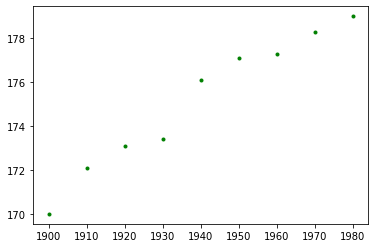

In [18]:
heights = data['Height(cm)']
years = data.index
plt.plot(years, heights, 'g.')

**How would you describe the trend?**
1. Is there a trend?

Answer: Yes
2. Is the trend upward or downward?

Answer: There is an increasing trend.
3. It the trend consistent?

Answer:The trend is flat during 1920s and 1950s. The increase is sharp during the 1930s.

**Conclusion**: The trend closely follows a straight line.

## 7. Modeling

Since we haven't studied any modeling method yet, let's use our intuition to find a function that describes the relation between year and height.
- Linear model ($height = m \cdot year + b$) seems a good fit to the data.
- What is a good value for $m$?
- What is a good value for $b$?
- Plot the line represented by the linear model
    - Create a list of x-coordinates using `np.linspace`
    - Calculate the corresponding y-coordinates
    - Use these two lists to plot the line.

In [19]:
# Calculate the average increase per year between 1900 and 1980

m1 = (data.loc[1980, 'Height(cm)'] - data.loc[1900, 'Height(cm)']) / 80
print("Slope:", m1)

Slope: 0.1125


In [21]:
# Let the slope be the average rate of increase.
# If the model is height = m * year + b, 
# find the value of b so that point (1900, 170.0) lies on the line.

b1 = 170 - m1 * 1900
print(b1)

-43.75


Based on our discussion, the model is:

Height = 0.1175 * Year - 43.75.

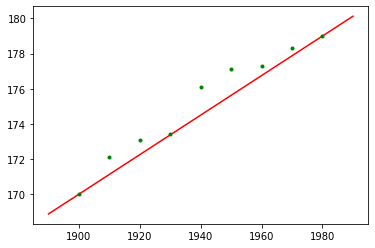

In [23]:
# Plot the model line.
x_coordinates = [1890, 1990]
y_coordinates = []
for year in x_coordinates:
    y_coordinates.append(m1 * year + b1)

plt.plot(x_coordinates, y_coordinates, "r-")
plt.plot(years, heights, 'g.')

**Can you find another line that fits the model better?**

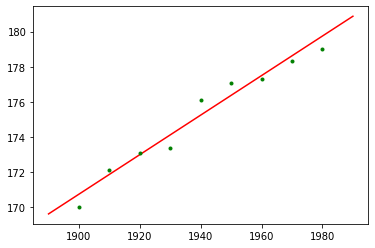

In [30]:
m2 = 0.1125
b2 = -43
# Plot the model line.
x_coordinates = [1890, 1990]
y_coordinates = []
for year in x_coordinates:
    y_coordinates.append(m2 * year + b2)

plt.plot(x_coordinates, y_coordinates, "r-")
plt.plot(years, heights, 'g.')

In [33]:
# What are the model's prediction for 1900, 1920, ..., 1980?
pred_1930 = m2 * 1930 + b2
print("Model's prediction on 1930:", pred_1930)
print("The actual value on 1930:", data.loc[1930, "Height(cm)"])
print("The error made on 1930:", pred_1930 - data.loc[1930, "Height(cm)"])

Model's prediction on 1930: 174.125
The actual value on 1930: 173.4
The error made on 1930: 0.7249999999999943


In [34]:
# Display the error made on 1900, 1910, 1920, ..., 1980
for year in data.index:
    pred = m2 * year + b2
    print("Model's prediction on ", year, ":", pred)
    print("The actual value on ", year, ":", data.loc[year, "Height(cm)"])
    print("The error made on ", year, ":", pred - data.loc[year, "Height(cm)"])
    print("-"*20)

Model's prediction on  1900 : 170.75
The actual value on  1900 : 170.0
The error made on  1900 : 0.75
--------------------
Model's prediction on  1910 : 171.875
The actual value on  1910 : 172.1
The error made on  1910 : -0.22499999999999432
--------------------
Model's prediction on  1920 : 173.0
The actual value on  1920 : 173.1
The error made on  1920 : -0.09999999999999432
--------------------
Model's prediction on  1930 : 174.125
The actual value on  1930 : 173.4
The error made on  1930 : 0.7249999999999943
--------------------
Model's prediction on  1940 : 175.25
The actual value on  1940 : 176.1
The error made on  1940 : -0.8499999999999943
--------------------
Model's prediction on  1950 : 176.375
The actual value on  1950 : 177.1
The error made on  1950 : -0.7249999999999943
--------------------
Model's prediction on  1960 : 177.5
The actual value on  1960 : 177.3
The error made on  1960 : 0.19999999999998863
--------------------
Model's prediction on  1970 : 178.625
The actua

## 8. Model Evaluation
- Objective: find a linear model whose predictions are *close* to the actual values.
- Metric on closeness: **mean square error (MSE):**
$$MSE = \frac{1}{\textit{number of data}}\sum_{\text{(x, y) in dataset}}(mx + b - y)^2$$

Now that we have multiple model candidates, which one gives the smallest MSE?

In [ ]:
# Example: Calculate the error for 1930



In [ ]:
# Calculate errors for each year



In [ ]:
# Calculate the mean squared error



## 9: Use the Model
- What is your prediction on the average height in 1890?, 2000? 2050?
- Check with the raw dataset and see if your 1890 prediction is close.

In [ ]:
# Calculate the model prediction for year = 1890



In [ ]:
# Find the actual average height for year 1890.

